Overfitting to see if network is training
================

We try to train small spots of our dataset for getting overfitting. After we see this is working, we can train "the whole" data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable

from deeplearner.data_utils import load_mammography_data
from splitting import split_data

* One image 

In [2]:
train_data = load_mammography_data('data/train.txt')
val_data = load_mammography_data('data/val.txt')
test_data = load_mammography_data('data/test.txt')

train_data_one = [train_data[0]]
val_data_one = [val_data[0]]

print("Train size: %i" % len(train_data_one))
print("Val size: %i" % len(val_data_one))

Train size: 1
Val size: 1


Training the network with this smaller dataset

In [3]:
from deeplearner.classifiers.classification_mammograms import ClassificationMammograms
from deeplearner.solver import Solver

best_model = None

num_epochs = 20
batch_size = [32]

learning_rates = [1e-4]

for batch in batch_size:
    train_loader = torch.utils.data.DataLoader(train_data_one, batch_size=batch, shuffle=True, num_workers=1)
    val_loader = torch.utils.data.DataLoader(train_data_one, batch_size=batch, shuffle=False, num_workers=1)
    for lr in learning_rates:
        model = ClassificationMammograms()
        solver = Solver(optim_args={"lr": lr, 
                                        #"betas": (0.9, 0.999),
                                        #"eps": 1e-8,
                                        "weight_decay": 0.0})

        solver.train(model, train_loader, val_loader, log_nth=1000, num_epochs=num_epochs)
        print(lr,batch)
            


START TRAIN.
[Epoch 1/20] TRAIN loss: 11.860371589660645, acc: 0.0
[Epoch 1/20] VAL loss: 7.157012462615967, acc: 0.0
[Epoch 2/20] TRAIN loss: 8.170282363891602, acc: 0.0
[Epoch 2/20] VAL loss: 5.099117755889893, acc: 0.0
[Epoch 3/20] TRAIN loss: 5.771306037902832, acc: 0.0
[Epoch 3/20] VAL loss: 3.2191529273986816, acc: 0.0
[Epoch 4/20] TRAIN loss: 4.094735145568848, acc: 0.0
[Epoch 4/20] VAL loss: 1.2202181816101074, acc: 1.0
[Epoch 5/20] TRAIN loss: 1.1794490814208984, acc: 1.0
[Epoch 5/20] VAL loss: 0.18153667449951172, acc: 1.0
[Epoch 6/20] TRAIN loss: 0.23713016510009766, acc: 1.0
[Epoch 6/20] VAL loss: 0.022126197814941406, acc: 1.0
[Epoch 7/20] TRAIN loss: 0.018332481384277344, acc: 1.0
[Epoch 7/20] VAL loss: 0.0044612884521484375, acc: 1.0
[Epoch 8/20] TRAIN loss: 0.002933502197265625, acc: 1.0
[Epoch 8/20] VAL loss: 0.001125335693359375, acc: 1.0
[Epoch 9/20] TRAIN loss: 0.0014896392822265625, acc: 1.0
[Epoch 9/20] VAL loss: 0.0002994537353515625, acc: 1.0
[Epoch 10/20] TRAIN

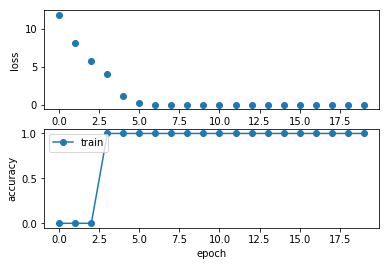

In [4]:
plt.subplot(2, 1, 1)
plt.plot(solver.train_loss_history, 'o')
#plt.plot(solver.val_loss_history, 'o')
plt.xlabel('iteration')
plt.ylabel('loss')

plt.subplot(2, 1, 2)
#plt.plot(solver.train_acc_history, '-o')
plt.plot(solver.val_acc_history, '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

* Ten images

In [5]:
train_data = load_mammography_data('data/train.txt')
val_data = load_mammography_data('data/val.txt')
test_data = load_mammography_data('data/test.txt')

train_data_ten = train_data[0:10]
val_data_ten = val_data[0:10]

print("Train size: %i" % len(train_data_ten))
print("Val size: %i" % len(val_data_ten))

Train size: 10
Val size: 10


In [6]:
from deeplearner.classifiers.classification_mammograms import ClassificationMammograms
from deeplearner.solver import Solver

best_model = None

num_epochs = 20
batch_size = [32]

learning_rates = [1e-4]

for batch in batch_size:
    train_loader = torch.utils.data.DataLoader(train_data_ten, batch_size=batch, shuffle=True, num_workers=1)
    val_loader = torch.utils.data.DataLoader(train_data_ten, batch_size=batch, shuffle=False, num_workers=1)
    for lr in learning_rates:
        model = ClassificationMammograms()
        solver = Solver(optim_args={"lr": lr, 
                                        #"betas": (0.9, 0.999),
                                        #"eps": 1e-8,
                                        "weight_decay": 0.0})

        solver.train(model, train_loader, val_loader, log_nth=1000, num_epochs=num_epochs)
        print(lr,batch)
            


START TRAIN.
[Epoch 1/20] TRAIN loss: 9.478472709655762, acc: 0.0
[Epoch 1/20] VAL loss: 5.749745845794678, acc: 0.0
[Epoch 2/20] TRAIN loss: 5.833444118499756, acc: 0.0
[Epoch 2/20] VAL loss: 3.460214614868164, acc: 0.3
[Epoch 3/20] TRAIN loss: 3.730649471282959, acc: 0.4
[Epoch 3/20] VAL loss: 1.1996829509735107, acc: 1.0
[Epoch 4/20] TRAIN loss: 1.4073669910430908, acc: 0.9
[Epoch 4/20] VAL loss: 0.09457206726074219, acc: 1.0
[Epoch 5/20] TRAIN loss: 0.1761259138584137, acc: 1.0
[Epoch 5/20] VAL loss: 0.004322624299675226, acc: 1.0
[Epoch 6/20] TRAIN loss: 0.0068378448486328125, acc: 1.0
[Epoch 6/20] VAL loss: 0.00037288665771484375, acc: 1.0
[Epoch 7/20] TRAIN loss: 0.0003799438418354839, acc: 1.0
[Epoch 7/20] VAL loss: 3.299712989246473e-05, acc: 1.0
[Epoch 8/20] TRAIN loss: 5.683898780262098e-05, acc: 1.0
[Epoch 8/20] VAL loss: 2.670288040462765e-06, acc: 1.0
[Epoch 9/20] TRAIN loss: 4.19616708313697e-06, acc: 1.0
[Epoch 9/20] VAL loss: 0.0, acc: 1.0
[Epoch 10/20] TRAIN loss: 1.9

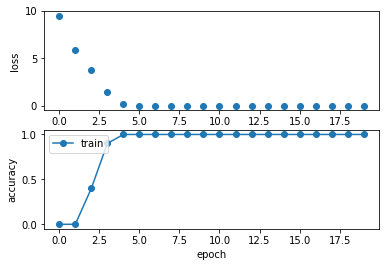

In [8]:
plt.subplot(2, 1, 1)
plt.plot(solver.train_loss_history, 'o')
#plt.plot(solver.val_loss_history, 'o')
plt.xlabel('iteration')
plt.ylabel('loss')

plt.subplot(2, 1, 2)
plt.plot(solver.train_acc_history, '-o')
#plt.plot(solver.val_acc_history, '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()